# Project 4

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import data
df = pd.read_csv('diamonds.csv')

In [4]:
# check data
df.head()
# columns:
print(df.columns)

# remove the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# encode cut, color, clarity as numerical values
df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df['color'] = df['color'].map({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7})
df['clarity'] = df['clarity'].map({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})

labels = df['price']


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


### Question 1.1

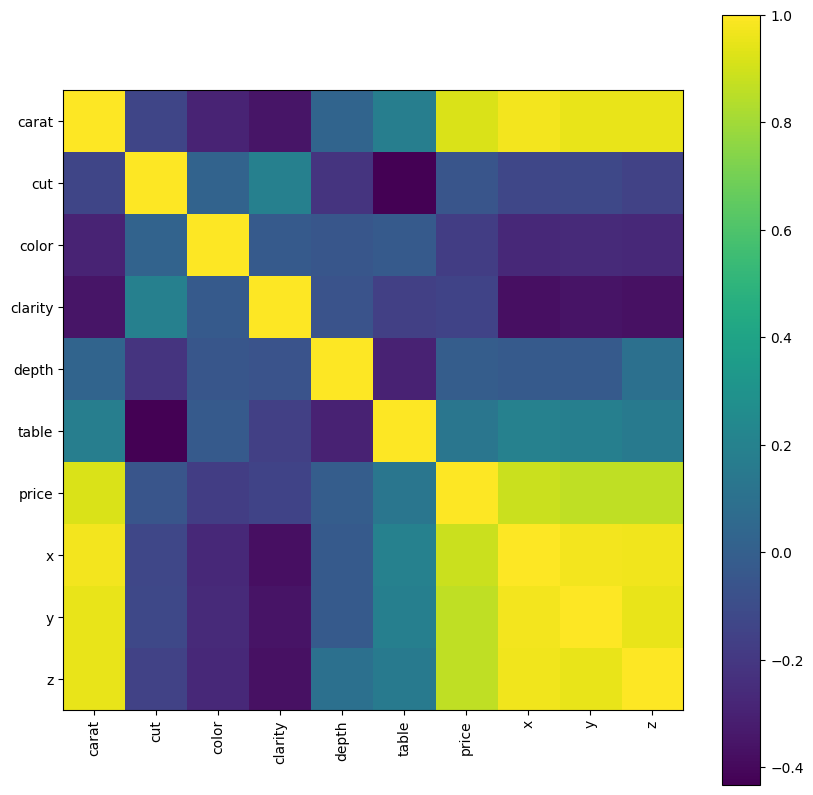

In [5]:
# Plot a heatmap of the Pearson correlation matrix of the dataset columns.

plt.figure(figsize=(10,10))
# show values in the matrix
plt.imshow(df.corr())
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [6]:
# show the correlation matrix
corr = df.corr()
# the most correlated features with price
corr['price'].sort_values(ascending=False)

price      1.000000
carat      0.921591
x          0.884436
y          0.865422
z          0.861250
table      0.127134
depth     -0.010648
cut       -0.053493
clarity   -0.146802
color     -0.172509
Name: price, dtype: float64

> Report which features have the highest absolute correlation with the target variable

Answer: The carat has the highest correlation with the price.

> Describe what the correlation patterns suggest.

Answer:
- The features x, y, z are highly correlated with each other. This is because the size of the round diamond is typically related with each other.
- The carat feature is also much correlated with the x, y, z features. This is intuitive because typacally the larger the diamond, the heavier it is.
- The color, clarity, and cut features are not correlated with each other.

### Question 1.2

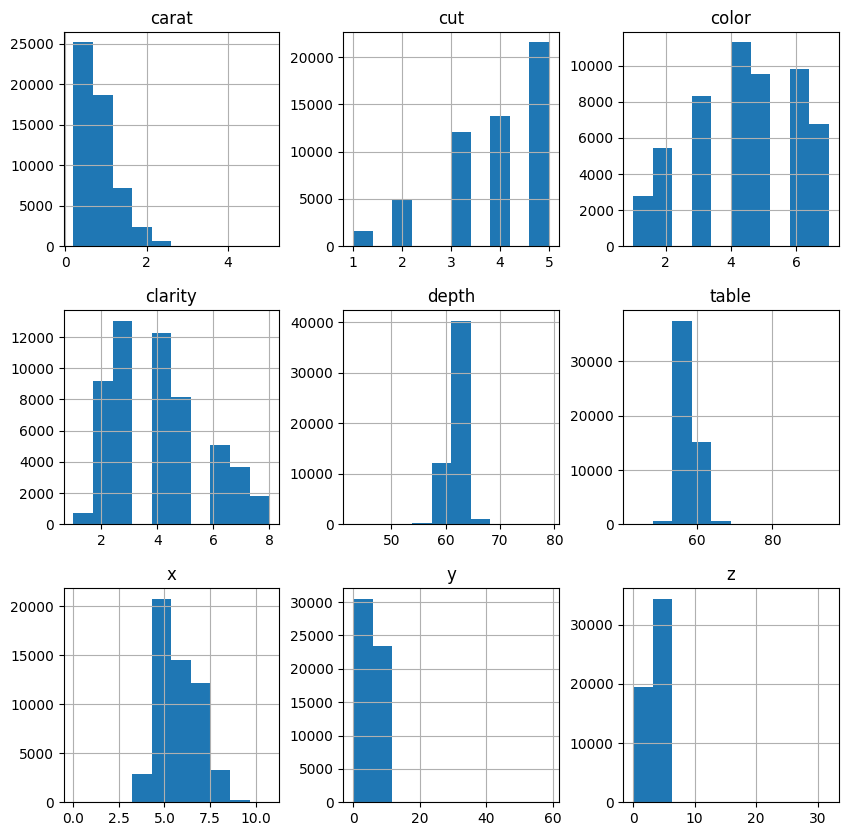

In [7]:
# Plot the histogram of numerical features.
df = df.drop('price', axis=1)
df.hist(figsize=(10,10))
plt.show()

> What preprocessing can be done if the distribution of a feature has high skewness?

- Log transformation
- Square root transformation
- Box-Cox transformation

### Question 1.3

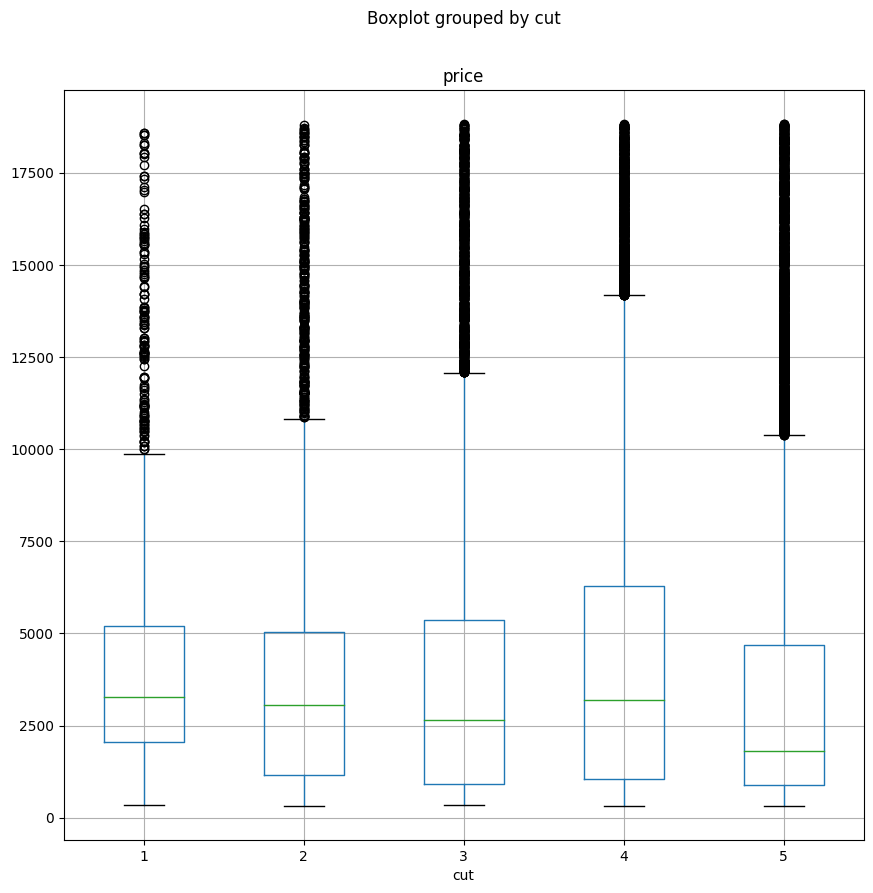

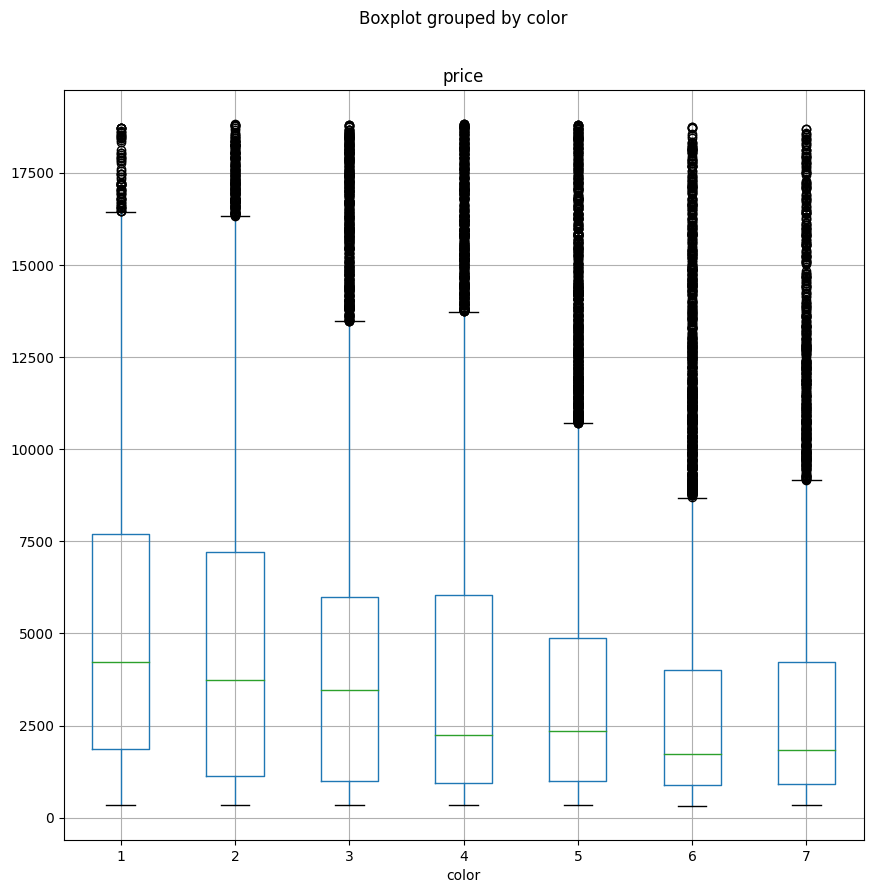

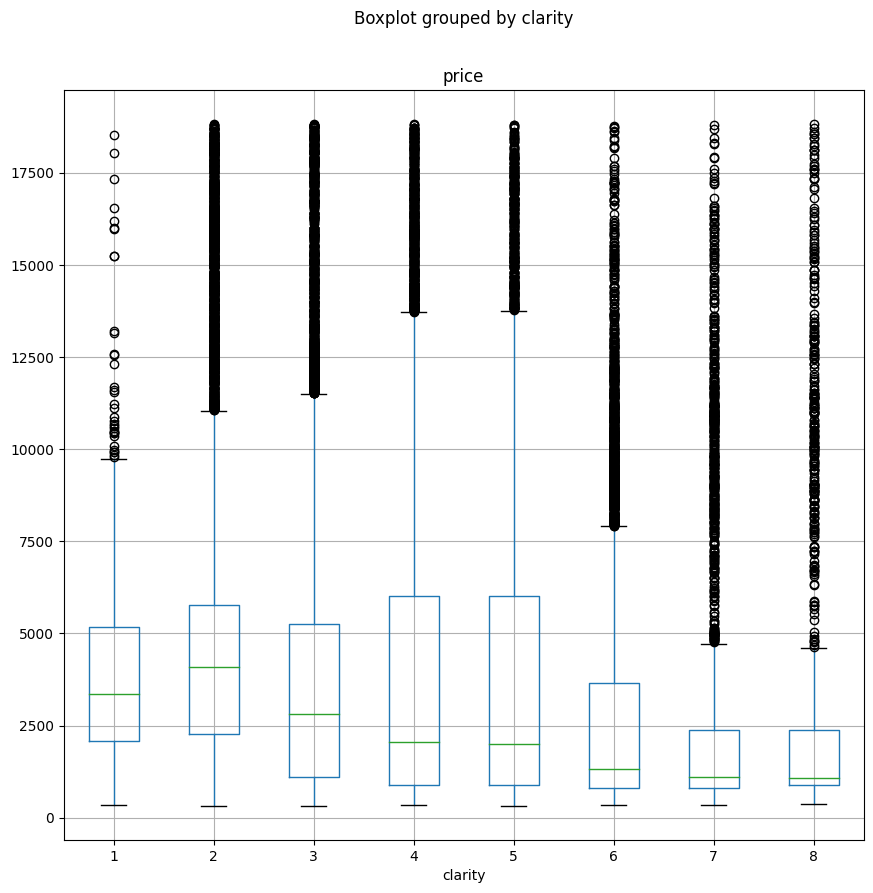

In [8]:
# Construct and inspect the box plot of categorical features vs target variable.
df['price'] = labels

# get the labels back
df.boxplot(column='price', by='cut', figsize=(10,10))
plt.show()

df.boxplot(column='price', by='color', figsize=(10,10))
plt.show()

df.boxplot(column='price', by='clarity', figsize=(10,10))
plt.show()


> What do you find from the box plots?

Answer:
- Cut: In General, The price of the diamonds with 4th level cut is higher than the other levels.
- Color: There is a trend that the higher the color grade, the lower the price, but the extremely expensive diamonds appear in the high-grade color.
- Clarity: Compared to very low and very high clarity diamonds, the medium clarity diamonds are more diversity in price, and the extreme values are higher.

### Question 1.4

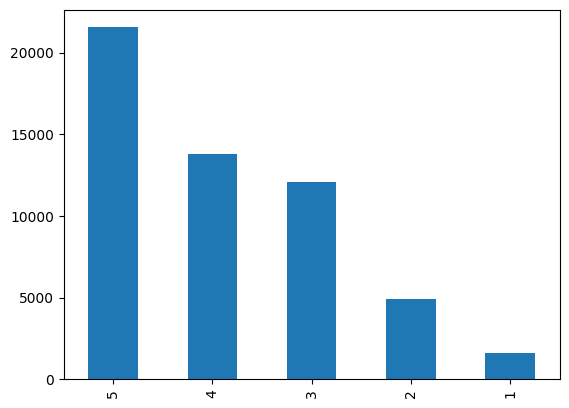

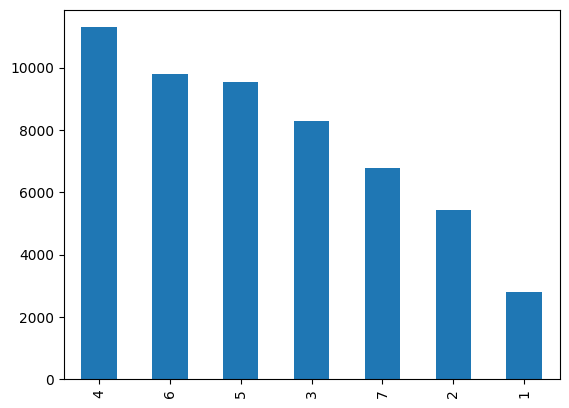

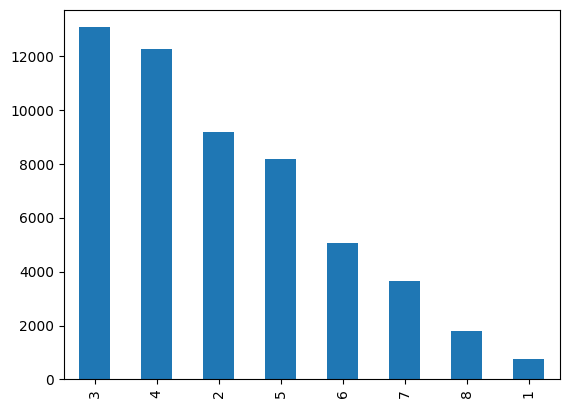

In [9]:
# plot the counts by cut, color and clarity
df['cut'].value_counts().plot(kind='bar')
plt.show()

df['color'].value_counts().plot(kind='bar')
plt.show()

df['clarity'].value_counts().plot(kind='bar')
plt.show()

### Question 2.1

In [10]:
# standardize the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = df.drop('price', axis=1)
features = scaler.fit_transform(features)

In [11]:
# show the first 5 rows of the standardized features
features[:5]

array([[-1.19816781,  0.98147332,  0.93716275, -1.24521508, -0.17409151,
        -1.09967199, -1.58783745, -1.53619556, -1.57112919],
       [-1.24036129,  0.08588908,  0.93716275, -0.63809506, -1.36073849,
         1.58552871, -1.64132529, -1.65877419, -1.74117497],
       [-1.19816781, -1.70527938,  0.93716275,  0.57614496, -3.38501862,
         3.37566251, -1.49869105, -1.45739502, -1.74117497],
       [-1.07158736,  0.08588908, -1.41427211, -0.03097505,  0.45413336,
         0.24292836, -1.36497146, -1.31730516, -1.28771955],
       [-1.02939387, -1.70527938, -2.00213083, -1.24521508,  1.08235823,
         0.24292836, -1.24016651, -1.21223777, -1.11767377]])

### Question 2.2

              MIR             FR
carat    1.652952  304051.486619
cut      0.054443     154.784468
color    0.138484    1654.401244
clarity  0.217753    1188.007065
depth    0.032506       6.115863
table    0.034343     886.119363
x        1.412755  193741.523066
y        1.423420  160915.662263
z        1.361705  154923.266553


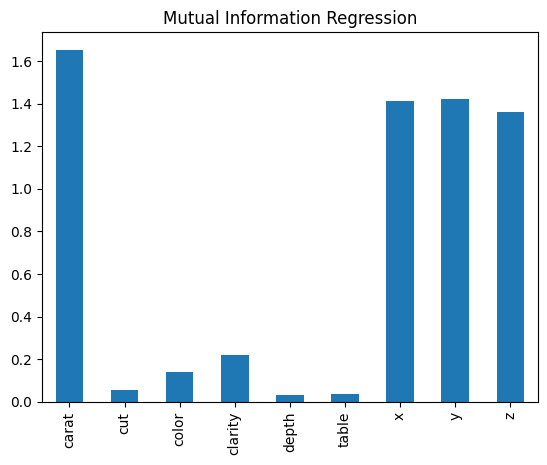

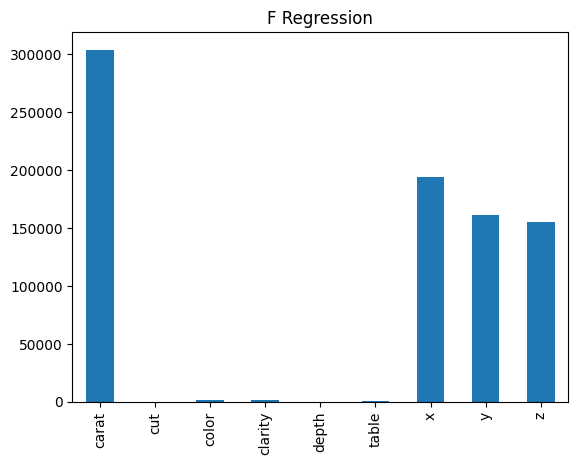

In [12]:
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest

mir = SelectKBest(mutual_info_regression, k="all").fit(features, labels)
fr = SelectKBest(f_regression, k="all").fit(features, labels)

col_names =[ 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
mir_scores = pd.DataFrame(mir.scores_, columns=['MIR'])
fr_scores = pd.DataFrame(fr.scores_, columns=['FR'])
scores = pd.concat([mir_scores, fr_scores], axis=1)
scores.index = col_names
print(scores)

# plot the scores
scores['MIR'].plot(kind='bar')
plt.title('Mutual Information Regression')
plt.show()

scores['FR'].plot(kind='bar')
plt.title('F Regression')
plt.show()


> Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types?

Answer:
- By selecting the features with high scores and removing the features with low scores, we can reduce the complexity of the model, which can avoid overfitting and improve the RMSE of the model.
- It is not true for all model types. For example, the linear regression model is not affected by the feature selection because the parameters of linear regression could be reduced to zero if the feature is not important.


> List two features that has the lowest MI w.r.t the target.

Answer: The depth and table features have the lowest MI w.r.t the target.

### Question 3

In [13]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

> Explain what OOB error and R2 score mean

Answer:
- OOB error: An estimate of the performance of the ensemble model on unseen data. It is calculated by averaging the error accross all trees in the forest, performed on all samples in the training set that are not used in the construction of the tree.
- $R^2$ score: A measure of how well the model fits the data. It is calculated by the sum of squared residuals divided by the total sum of squares.

### 3.3.1 Linear Regression

### Question 4.1

> Explain how each regularization scheme affects the learned parameter set.

Answer:
- OLS: The OLS model is not regularized, the model will try its best to fit the training data. The model will have high variance and low bias.
- Lasso: The Lasso model uses L1 regularization, which will shrink the parameters to zero by minimizing $\sum |W|$.
- Ridge: The Ridge model uses L2 regularization, which will try to shrink the parameters towards zero by minimizing $\sum W^2$, but will not let them be exactly zero.

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [15]:
# use 10-fold cross validation to evaluate the performance of the models
# try different values of alpha
alphas = np.logspace(-4, 4, 20)

lasso_scores = []
ridge_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)

    # evaluate models using 10-fold cross validation and neg_mean_squared_error
    lasso_scores.append(np.sqrt(-np.mean(cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))))
    ridge_scores.append(np.sqrt(-np.mean(cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))))

In [16]:
# find the best alpha
best_alpha_lasso = alphas[np.argmin(lasso_scores)]
best_alpha_ridge = alphas[np.argmin(ridge_scores)]

print('Best alpha for Lasso: ', best_alpha_lasso)
print('Best alpha for Ridge: ', best_alpha_ridge)



Best alpha for Lasso:  1.623776739188721
Best alpha for Ridge:  29.763514416313132


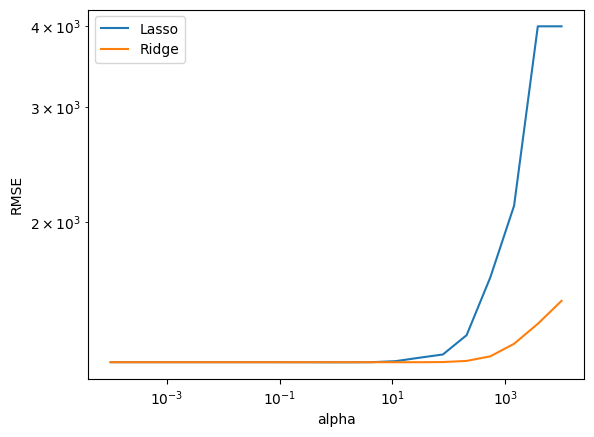

In [17]:
# plot the RMSE vs alpha
plt.plot(alphas, lasso_scores, label='Lasso')
plt.plot(alphas, ridge_scores, label='Ridge')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [18]:
# train the models with the best alpha
lasso = Lasso(alpha=best_alpha_lasso)
ridge = Ridge(alpha=best_alpha_ridge)
ols = LinearRegression()

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
ols.fit(X_train, y_train)

LinearRegression()

In [19]:
# evaluate the models on the test set
from sklearn.metrics import mean_squared_error

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_ols = ols.predict(X_test)

print('RMSE for Lasso: ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('RMSE for Ridge: ', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('RMSE for OLS: ', np.sqrt(mean_squared_error(y_test, y_pred_ols)))

RMSE for Lasso:  1224.6246634174897
RMSE for Ridge:  1224.5245541471936
RMSE for OLS:  1224.6103454115878


### Question 4.2

> Report your choice of the best regularization scheme along with the optimal penalty
parameter and explain how you computed it.

Answer:
- I used 10-fold cross validation to evaluate the performance of the models. I tried different values of alpha and found the best alpha for each model. The best alpha for Lasso is 1.624 and the best alpha for Ridge is 29.764.
- Using the best alpha, the best regularization scheme is Ridge. It has the lowest RMSE on the test set.

### Question 4.3
>  Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Explain why.

Answer:
- Yes, feature standardization plays a role in improving the model performance. Ridge regression is sensitive to the scale of the features. If the features are not standardized, the L2 regularization will not be able to shrink the parameters towards zero.

### Question 4.4

>  Some linear regression packages return p-values for different features2. What is the meaning of these p-values and how can you infer the most significant features?

Answer:
- p-value: The probability of observing a test statistic that is as extreme as or more extreme than the observed one, assuming the null hypothesis is true, is known as the p-value.
- The most significant features are those with the lowest p-values.

## 3.3.2 Polynomial Regression

In [20]:
# find polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# try different degrees
degrees = np.arange(1, 7)

poly_scores = []

poly_features = []

for degree in degrees:
    print("Degree: ", degree)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # evaluate models using 10-fold cross validation and neg_mean_squared_error
    poly_scores.append(np.sqrt(-np.mean(cross_val_score(ols, X_train_poly, y_train, cv=10, scoring='neg_mean_squared_error'))))

    # record the most significant features
    print(poly.get_feature_names_out())
    poly_features.append(poly.get_feature_names_out())


Degree:  1
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8']
Degree:  2
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x1^2' 'x1 x2' 'x1 x3'
 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5'
 'x2 x6' 'x2 x7' 'x2 x8' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8'
 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8'
 'x6^2' 'x6 x7' 'x6 x8' 'x7^2' 'x7 x8' 'x8^2']
Degree:  3
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x1^2' 'x1 x2' 'x1 x3'
 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5'
 'x2 x6' 'x2 x7' 'x2 x8' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8'
 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8'
 'x6^2' 'x6 x7' 'x6 x8' 'x7^2' 'x7 x8' 'x8^2' 'x0^3' 'x0^2 x1' 'x0^2 x2'
 'x0^2 x3' 'x0^2 x4' 'x0^2 x5' 'x0^2 x6' 'x0^2 x7' 'x0^2 x8' 'x0 x1^2'
 'x0 

In [28]:
# change x_n to feature names
feature_names = list(filter(lambda x: x != 'price', df.columns))

import re

for i in range(len(poly_features)):
    for j in range(len(poly_features[i])):
        poly_features[i][j] = re.sub(r'x\d', lambda x: feature_names[int(x.group(0)[1:])], poly_features[i][j])

In [29]:
poly_features

[array(['1', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
        'y', 'z'], dtype=object),
 array(['1', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
        'y', 'z', 'carat^2', 'carat cut', 'carat color', 'carat clarity',
        'carat depth', 'carat table', 'carat x', 'carat y', 'carat z',
        'cut^2', 'cut color', 'cut clarity', 'cut depth', 'cut table',
        'cut x', 'cut y', 'cut z', 'color^2', 'color clarity',
        'color depth', 'color table', 'color x', 'color y', 'color z',
        'clarity^2', 'clarity depth', 'clarity table', 'clarity x',
        'clarity y', 'clarity z', 'depth^2', 'depth table', 'depth x',
        'depth y', 'depth z', 'table^2', 'table x', 'table y', 'table z',
        'x^2', 'x y', 'x z', 'y^2', 'y z', 'z^2'], dtype=object),
 array(['1', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
        'y', 'z', 'carat^2', 'carat cut', 'carat color', 'carat clarity',
        'carat depth', 'carat table', 'carat x'

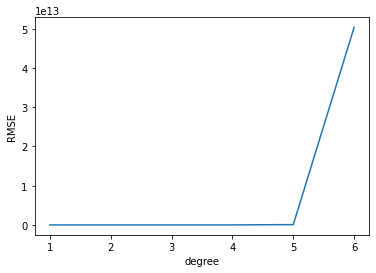

In [ ]:
# plot the RMSE vs degree
plt.plot(degrees, poly_scores)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()

In [23]:
# find the best degree
best_degree = degrees[np.argmin(poly_scores)]

print('Best degree: ', best_degree)

Best degree:  2


In [34]:
# use 2 as the best degree, train the model and find the most significant features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

ols.fit(X_train_poly, y_train)

y_pred_poly = lasso.predict(X_test_poly)

print('RMSE for polynomial regression: ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))


RMSE for polynomial regression:  791.8983797048712


In [50]:
# find f1 and f2
f1 = SelectKBest(f_regression, k=5).fit(X_train_poly, y_train)
f2 = SelectKBest(mutual_info_regression, k=5).fit(X_train_poly, y_train)


In [55]:
poly_features = poly.get_feature_names_out()

# change x_n to feature names
feature_names = list(filter(lambda x: x != 'price', df.columns))

import re

for i in range(len(poly_features)):
    poly_features[i] = re.sub(r'x\d', lambda x: feature_names[int(x.group(0)[1:])], poly_features[i])

# find the most significant features
f1_features = [poly_features[i] for i in f1.get_support(indices=True)]
f2_features = [poly_features[i] for i in f2.get_support(indices=True)]

print('Most significant features using f_regression: ', f1_features)
print('Most significant features using mutual_info_regression: ', f2_features)

Most significant features using f_regression:  ['carat', 'x', 'y', 'z', 'carat x']
Most significant features using mutual_info_regression:  ['carat', 'y', 'carat^2', 'carat color', 'carat clarity']


### Question 5.1

> What are the most salient features? Why?

Answer:
- The most salient features are:
- f_regression: 'carat', 'x', 'y', 'z', 'carat x'
- mutual_info_regression: 'carat', 'y', 'carat^2', 'carat color', 'carat clarity'
- The scores are computed using f_regression and mutual_info_regression. The features with the highest scores are the most salient features.

### Question 5.2

> What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

Answer:
- After plotting the RMSE vs degree, I determined that the optimal degree of polynomial is 2, as it had the lowest RMSE.
- If a polynomial has a very high degree, it indicates that the model may be overfitting the training data. This results in a low bias but a high variance, causing the model to perform well on the training data but poorly on the testing data.

## 3.3.3 Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# try different numbers of hidden layers
hidden_layers = [
    (50, ),
    (50, 75),
    (100, 75, 10),
    (100, 75, 50, 25),
    (100, 75, 50, 25, 10)
]

# try 4 different weight decay
weight_decays = [0, 0.0001, 0.001, 0.01]

nn_scores = []

nn = MLPRegressor(
    activation='relu',
    solver='adam',
    max_iter=100000,
)

# use grid search to find the best parameters
gs = GridSearchCV(nn, param_grid={'hidden_layer_sizes': hidden_layers, 'alpha': weight_decays}, n_jobs=-1, verbose=10)

In [ ]:
gs.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=MLPRegressor(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (50, 75), (100, 75, 10),
                                                (100, 75, 50, 25),
                                                (100, 75, 50, 25, 10)]},
             verbose=10)

In [ ]:

results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,306.357488,21.110299,0.008749,0.003108,0,"(50,)","{'alpha': 0, 'hidden_layer_sizes': (50,)}",0.974137,0.977348,0.961464,0.977409,0.977138,0.973499,0.006142,6
1,161.963629,20.712917,0.021164,0.006323,0,"(50, 75)","{'alpha': 0, 'hidden_layer_sizes': (50, 75)}",0.972692,0.979501,0.944335,0.980222,0.980657,0.971481,0.013880,10
2,127.596960,24.692903,0.025204,0.002867,0,"(100, 75, 10)","{'alpha': 0, 'hidden_layer_sizes': (100, 75, 10)}",0.971641,0.979401,0.964045,0.980281,0.980799,0.975234,0.006510,3
3,86.786204,24.108907,0.038982,0.008153,0,"(100, 75, 50, 25)","{'alpha': 0, 'hidden_layer_sizes': (100, 75, 5...",0.973565,0.978141,0.924046,0.981391,0.980714,0.967571,0.021936,15
4,82.932733,18.822746,0.035873,0.006180,0,"(100, 75, 50, 25, 10)","{'alpha': 0, 'hidden_layer_sizes': (100, 75, 5...",0.977635,0.977432,0.936735,0.979432,0.979542,0.970155,0.016733,12
5,283.857896,20.432192,0.006785,0.003596,0.0001,"(50,)","{'alpha': 0.0001, 'hidden_layer_sizes': (50,)}",0.972924,0.975849,0.942757,0.976165,0.977447,0.969028,0.013219,14
6,148.063942,21.706923,0.014503,0.001661,0.0001,"(50, 75)","{'alpha': 0.0001, 'hidden_layer_sizes': (50, 75)}",0.979616,0.979781,0.973620,0.979806,0.981227,0.978810,0.002660,2
7,139.340481,25.105009,0.031560,0.015519,0.0001,"(100, 75, 10)","{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",0.977532,0.979738,0.952203,0.980356,0.980956,0.974157,0.011038,5
8,92.331670,8.079100,0.035676,0.009870,0.0001,"(100, 75, 50, 25)","{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",0.977806,0.979005,0.889459,0.980880,0.980657,0.961561,0.036069,18
9,89.751494,23.173945,0.031173,0.001383,0.0001,"(100, 75, 50, 25, 10)","{'alpha': 0.0001, 'hidden_layer_sizes': (100, ...",0.978366,0.979774,0.931874,0.980985,0.979985,0.970197,0.019180,11


In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 0.001, 'hidden_layer_sizes': (50, 75)}
0.9790674719252885


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_nn = gs.best_estimator_.predict(X_test)
print('Best RMSE for NN: ', np.sqrt(mean_squared_error(y_test, y_pred_nn)))

RMSE for NN:  550.3965712069114


### Question 6.1

> Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).

Answer:
- The best network size is two hidden layers with 50 and 75 neurons respectively. The best weight decay is 0.001.

### Question 6.2

> How does the performance generally compare with linear regression? Why?

Answer:
- The performance of Neural Networks is better than linear regression.
- Maybe because NNs could capture the non-linear relationship between the features and the target, and more parameters could be learned.
- Even if some features are linearly correlated with the target, the NNs could still learn tit by using relu activation function.


### Question 6.3

> What activation function did you use for the output and why?

Answer:
- I used ReLU activation function for the output. That's because it could introduce non-linearity to the model and avoid the vanishing gradient problem.
- ReLU is also a good choice because it's easy to compute and it's computationally efficient.

### Question 6.4

> What is the risk of increasing the depth of the network too far?

Answer:
- If the depth of the network is too far, the model will suffer from overfitting. The model will have high variance and low bias, which will lead to a poor performance on the test set.

## 3.3.4 Random Forest

### Question 7.1
- Maximum number of features;
– Number of trees;
– Depth of each tree
> Explain how these hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training.

Answer:
- Maximum number of features: Controls the number of features that are considered at the split of each node. The smaller the number of features, the less complex the model is. This results in a regularization effect during training.
- Number of trees: The more trees, the more complex the model is, and the more accurate the model is. This results in a regularization effect during training.
- Depth of each tree: A deeper tree can model complex relationships between features, but it may also lead to overfitting.

### Question 7.2
> How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

Answer:
- Random forests capture the non-linear relationship between features by combining the results of different decision trees.
- Even though each decision tree is a linear model, they capture different aspects of data, and trained on random subsets of data. This results in a highly non-linear decision boundary.

In [36]:
from sklearn.ensemble import RandomForestRegressor


In [59]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    max_features=4,
    n_jobs=-1,
    verbose=10,
    oob_score=True,
)

rf.fit(X_train, y_train)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s


building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(max_depth=4, max_features=4, n_jobs=-1, oob_score=True,
                      verbose=10)

### Question 7.3

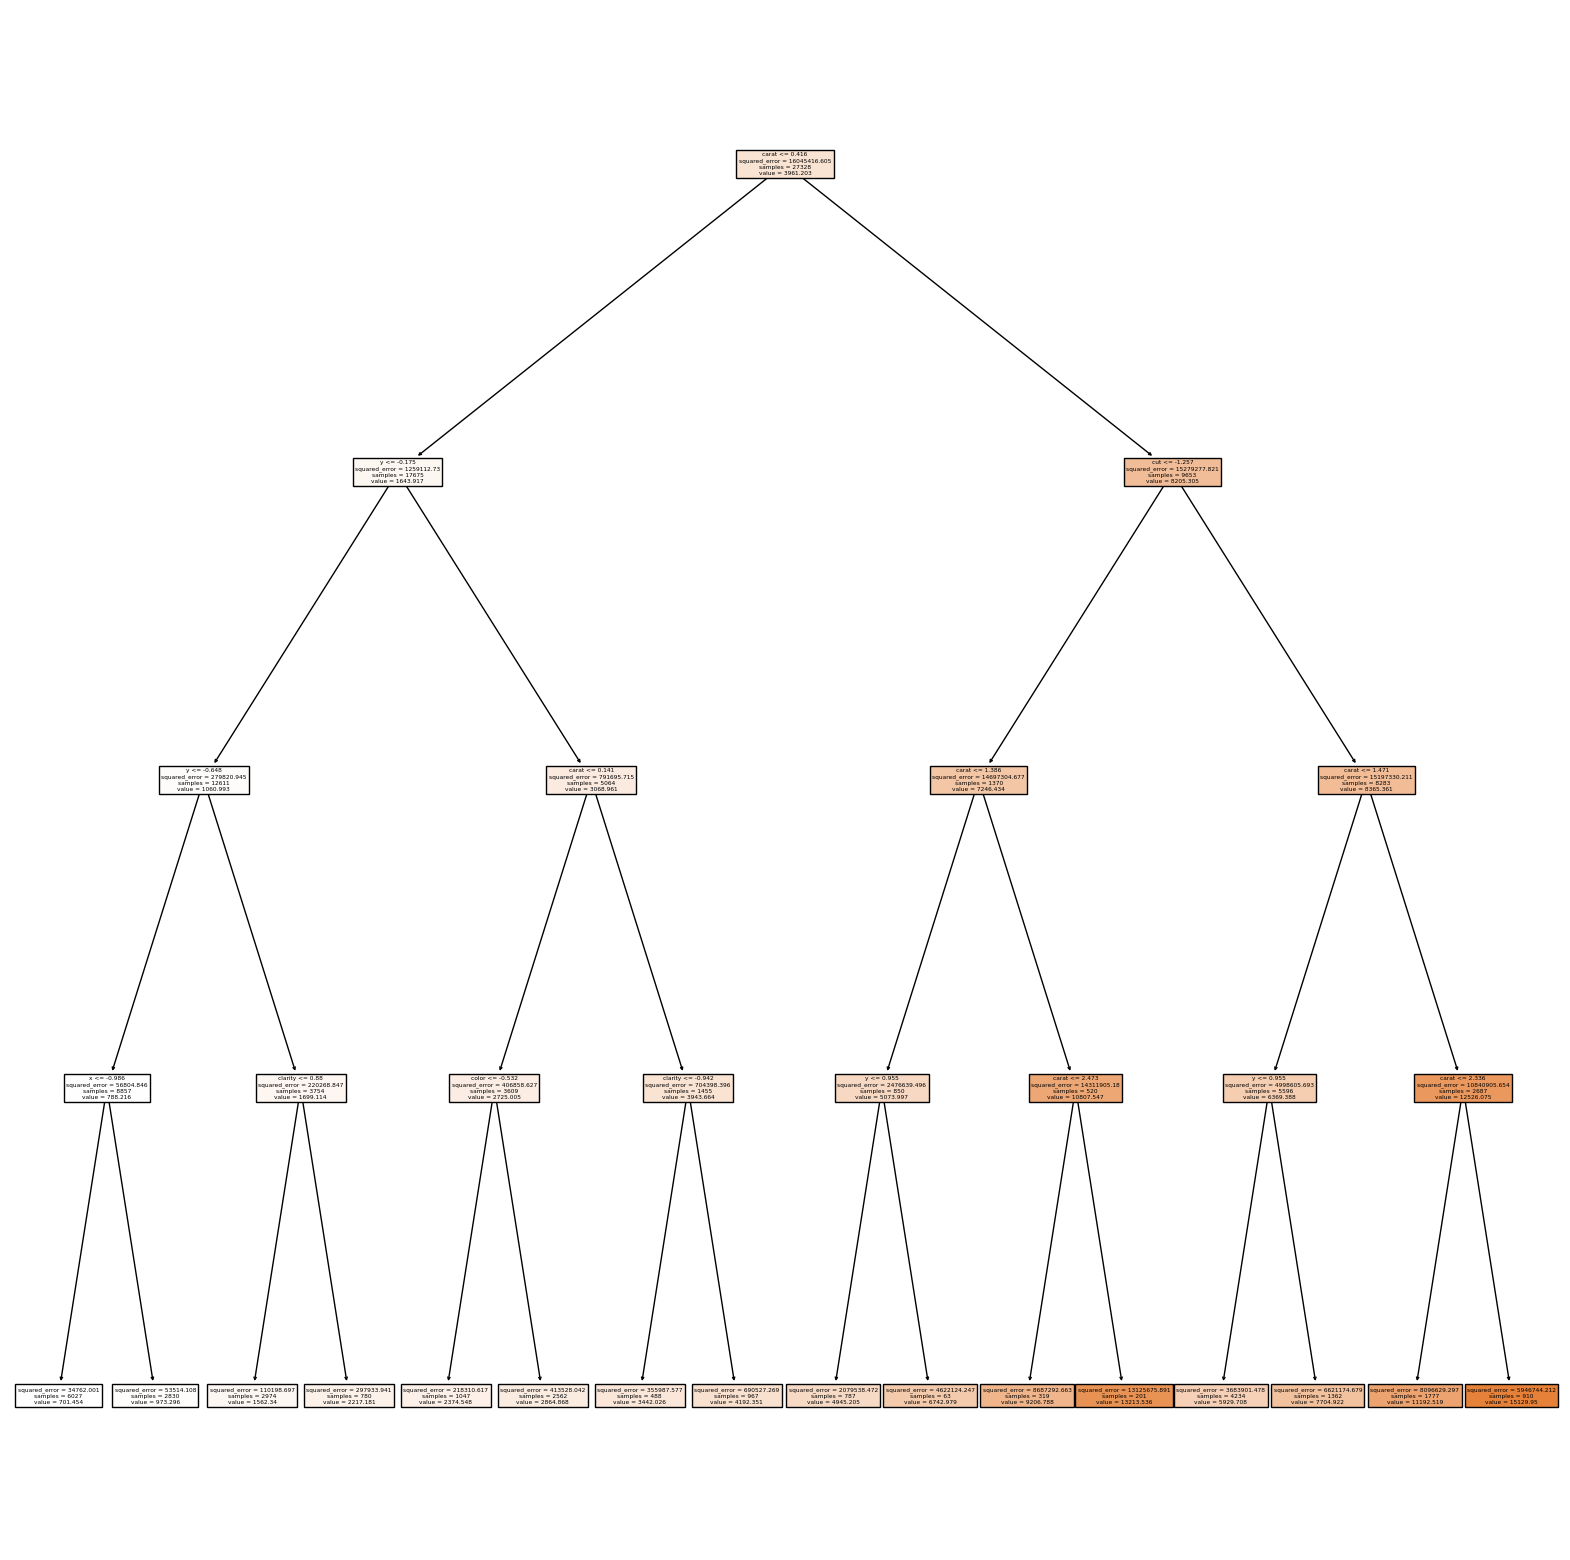

In [63]:
# randomly pick one tree and plot the structure of the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
rand_index = np.random.randint(0, 100)
plot_tree(rf.estimators_[rand_index], filled=True, feature_names=list(filter(lambda x: x != 'price', df.columns)))
plt.show()

In [64]:
# Which feature is selected for branching at the root node?

from sklearn.tree import export_text

# numpy.ndarray object has no attribute 'columns'

print(export_text(rf.estimators_[rand_index], feature_names=list(filter(lambda x: x != 'price', df.columns))))

|--- carat <= 0.42
|   |--- y <= -0.17
|   |   |--- y <= -0.65
|   |   |   |--- x <= -0.99
|   |   |   |   |--- value: [701.45]
|   |   |   |--- x >  -0.99
|   |   |   |   |--- value: [973.30]
|   |   |--- y >  -0.65
|   |   |   |--- clarity <= 0.88
|   |   |   |   |--- value: [1562.34]
|   |   |   |--- clarity >  0.88
|   |   |   |   |--- value: [2217.18]
|   |--- y >  -0.17
|   |   |--- carat <= 0.14
|   |   |   |--- color <= -0.53
|   |   |   |   |--- value: [2374.55]
|   |   |   |--- color >  -0.53
|   |   |   |   |--- value: [2864.87]
|   |   |--- carat >  0.14
|   |   |   |--- clarity <= -0.94
|   |   |   |   |--- value: [3442.03]
|   |   |   |--- clarity >  -0.94
|   |   |   |   |--- value: [4192.35]
|--- carat >  0.42
|   |--- cut <= -1.26
|   |   |--- carat <= 1.39
|   |   |   |--- y <= 0.95
|   |   |   |   |--- value: [4945.21]
|   |   |   |--- y >  0.95
|   |   |   |   |--- value: [6742.98]
|   |   |--- carat >  1.39
|   |   |   |--- carat <= 2.47
|   |   |   |   |--- value:

> Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others?

Answer:
- The feature selected for branching at the root node is 'carat'.
- The feature 'carat' is the most important feature in the dataset. So the tree is split firstly on the feature 'carat'.
- The feature corresponds to the important features extracted in 3.3.1.

### Question 7.4

In [65]:
# Measure OOB
print('OOB score: ', rf.oob_score_)
print('OOB Error: ', 1 - rf.oob_score_)

OOB score:  0.9219741440041382
OOB Error:  0.07802585599586176


> Explain what OOB error and R2 score means.

Answer:
- OOB error: The OOB error is the average error of the predictions of the out-of-bag samples. Out-of-bag samples are the samples that are not used to train the model. In this case, the OOB error is 0.078, so the random forest model fits the data well.
- R2 score: The R2 score is the coefficient of determination. It is a measure of how well the model fits the data. The higher the R2 score, the better the model fits the data.

## 3.3.5 CatBoost and Baysian Optimization

In [28]:
# determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).

search_space = {
   "learning_rate": [0.01, 0.05],
   "iterations": [200, 300],
   "depth": [8, 10],
   "l2_leaf_reg": [0.1, 1, 5, 10],
   "colsample_bylevel": [0.7, 0.9],
   "random_strength": [0.1, 0.5]
}

### Question 8.1

> Explain the hyperparameters

Answer:
- learning_rate: The step size that is used to update the weights of the model.
- iterations: The number of iterations to train the model.
- depth: The depth of the trees in catboost.
- l2_leaf_reg: The L2 regularization parameter of strength.
- colsample_bylevel: The fraction of features to use for each tree.
- subsample: the fraction of data to use for each iteration.
- random_strength: The strength of the randomization.

In [29]:
# Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Report the best hyperparameter set found and the corresponding RMSE.

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from catboost import CatBoostRegressor


In [30]:
catboostModel = CatBoostRegressor(
    loss_function='RMSE',
    verbose=10,
    random_state=42
)


In [32]:
# bayesian optimization
opt = BayesSearchCV(
    catboostModel,
    search_space,
    cv=2,
    n_iter=128,
    n_jobs=-1,
    verbose=10,
    random_state=42
)

opt.fit(X_train, y_train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

C:\Users\chunxu\miniconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

C:\Users\chunxu\miniconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
0:	learn: 3814.1966238	total: 9.57ms	remaining: 2.86s
10

BayesSearchCV(cv=2,
              estimator=<catboost.core.CatBoostRegressor object at 0x00000290758F1E10>,
              n_iter=128, n_jobs=-1, random_state=42,
              search_spaces={'colsample_bylevel': [0.7, 0.9], 'depth': [8, 10],
                             'iterations': [200, 300],
                             'l2_leaf_reg': [0.1, 1, 5, 10],
                             'learning_rate': [0.01, 0.05],
                             'random_strength': [0.1, 0.5]},
              verbose=10)

In [33]:
# print the best parameters
print(opt.best_params_)

OrderedDict([('colsample_bylevel', 0.9), ('depth', 8), ('iterations', 300), ('l2_leaf_reg', 0.1), ('learning_rate', 0.04749062043694347), ('random_strength', 0.1)])


In [34]:
# print the best score
print(opt.best_score_)

0.9813574757272168


In [35]:
# print the table of different parameters and their corresponding scores
results = pd.DataFrame(opt.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,param_random_strength,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,4.985085,0.010341,0.129355,0.004806,0.782021,9,293,1.0,0.036806,0.265647,"{'colsample_bylevel': 0.7820207917706627, 'dep...",0.980891,0.980860,0.980876,0.000016,38
1,7.315727,0.098094,0.135453,0.025684,0.867478,10,230,10.0,0.044565,0.124925,"{'colsample_bylevel': 0.8674776711106569, 'dep...",0.979427,0.979788,0.979607,0.000180,90
2,6.545334,0.007139,0.156863,0.000194,0.788967,10,210,1.0,0.017518,0.281466,"{'colsample_bylevel': 0.7889665024602304, 'dep...",0.976935,0.977401,0.977168,0.000233,115
3,3.376135,0.007814,0.097357,0.001760,0.862479,8,260,5.0,0.030922,0.138182,"{'colsample_bylevel': 0.8624791976714727, 'dep...",0.979478,0.980038,0.979758,0.000280,84
4,4.707888,0.008358,0.107789,0.004805,0.859911,9,253,5.0,0.046154,0.386812,"{'colsample_bylevel': 0.8599106883214347, 'dep...",0.980132,0.980568,0.980350,0.000218,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,9.350340,0.000001,0.166548,0.001498,0.9,10,300,1.0,0.046236,0.1,"{'colsample_bylevel': 0.9, 'depth': 10, 'itera...",0.980927,0.981082,0.981005,0.000077,26
124,5.529255,0.003503,0.120509,0.003005,0.890237,9,297,5.0,0.03761,0.374625,"{'colsample_bylevel': 0.8902365048660328, 'dep...",0.980228,0.980717,0.980473,0.000244,62
125,3.772516,0.008004,0.087271,0.000255,0.87153,8,282,1.0,0.02454,0.187542,"{'colsample_bylevel': 0.8715300790856679, 'dep...",0.979997,0.980326,0.980162,0.000164,73
126,8.272653,0.001001,0.149546,0.005002,0.879291,10,266,1.0,0.041908,0.281184,"{'colsample_bylevel': 0.8792912058139508, 'dep...",0.980715,0.980830,0.980773,0.000058,48


In [58]:
from catboost import CatBoostRegressor

best_cat_boost_model = CatBoostRegressor(
    loss_function='RMSE',
    verbose=10,
    random_state=42,
    colsample_bylevel=0.9,
    depth=8,
    iterations=300,
    l2_leaf_reg=0.1,
    learning_rate=0.04749062043694347,
    random_strength=0.1
)

best_cat_boost_model.fit(X_train, y_train)

0:	learn: 3814.1966238	total: 159ms	remaining: 47.5s
10:	learn: 2473.2958871	total: 257ms	remaining: 6.76s
20:	learn: 1664.3062267	total: 339ms	remaining: 4.51s
30:	learn: 1180.4202595	total: 431ms	remaining: 3.74s
40:	learn: 899.0334626	total: 525ms	remaining: 3.32s
50:	learn: 741.7115554	total: 681ms	remaining: 3.32s
60:	learn: 654.3220189	total: 791ms	remaining: 3.1s
70:	learn: 605.5549727	total: 891ms	remaining: 2.87s
80:	learn: 576.7476069	total: 1.04s	remaining: 2.82s
90:	learn: 558.2880053	total: 1.19s	remaining: 2.74s
100:	learn: 545.6770052	total: 1.31s	remaining: 2.59s
110:	learn: 536.3854340	total: 1.47s	remaining: 2.5s
120:	learn: 529.9993295	total: 1.59s	remaining: 2.36s
130:	learn: 523.3114810	total: 1.72s	remaining: 2.22s
140:	learn: 517.9907680	total: 1.84s	remaining: 2.08s
150:	learn: 513.2583913	total: 1.97s	remaining: 1.94s
160:	learn: 509.1044846	total: 2.09s	remaining: 1.81s
170:	learn: 505.7985669	total: 2.22s	remaining: 1.67s
180:	learn: 502.3691016	total: 2.33s	

In [59]:
# calculate the RMSE
from sklearn.metrics import mean_squared_error

y_pred = best_cat_boost_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

RMSE:  524.8315909570648


### Question 8.2

> Report the best hyperparameter set found and the corresponding RMSE.

Answer:
- The best hyperparameter set found is {'colsample_bylevel': 0.9, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 0.1, 'learning_rate': 0.04749062043694347, 'random_strength': 0.1}.
- The corresponding RMSE is 524.8315909570648.

### Question 8.3

> Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?

Answer:

- colsample_bylevel: A value closer to 1.0 means that more columns will be used at each level, which can improve model performance by increasing the diversity of the trees in the ensemble.
- depth: A deeper tree can capture more complex interactions between features, but may also overfit the training data. A smaller value of depth helps with regularization and reduces the generalization gap.
- iterations: A larger value can improve model performance, but also increases the training time.
- l2_leaf_reg: A larger value of L2 regularization can help with regularization and reduce the generalization gap.
- learning_rate: A smaller value of learning rate can help with regularization, but too small a value can slow down the convergence.
    random_strength: Amount of regularization applied to random projections of the data. A larger value of random_strength can help with regularization and reduce the generalization gap.

| Hyperparameter      | Effect on Performance | Effect on Regularization | Effect on Fitting Efficiency |
|---------------------|-----------------------|--------------------------|------------------------------|
| `colsample_bylevel` | +                     | -                        | -                            |
| `depth`             | -                     | +                        | -                            |
| `iterations`        | +                     | -                        | +                            |
| `l2_leaf_reg`       | -                     | +                        | -                            |
| `learning_rate`     | +/-                   | +/-                      | -                            |
| `random_strength`   | -                     | +                        | -                            |

Note: "+" indicates a positive effect, "-" indicates a negative effect, and "+/-" indicates the effect is not clear.